1.下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

stock1 = pd.read_excel('sz50.xlsx',None, index_col='datetime')


In [2]:
print (stock1.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


2.读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值

In [3]:
import pandas as pd

import numpy as np
import talib as ta
from datetime import datetime
stock1 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')
d=np.array(stock1.close)
print(type(d))
print(ta.MA(d,10)[-5:])


<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


3.将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

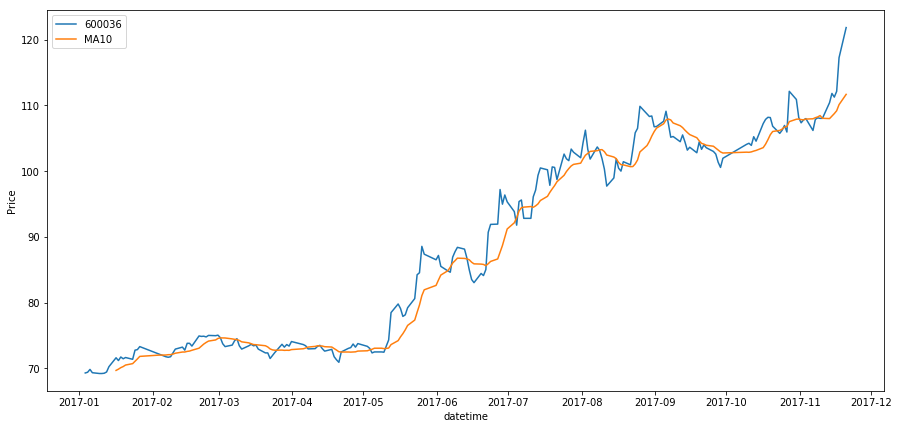

In [15]:
import pandas as pd
import numpy as np
import talib as ta
from datetime import datetime
import matplotlib.pyplot as plt
stock1 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')
d=np.array(stock1.close)
s=pd.Series(ta.MA(d,10))
s.index=stock1.index
plt.figure(figsize=(15, 7))
plt.plot(stock1.close)
plt.plot(s)
plt.xlabel('datetime')
plt.ylabel('Price')
plt.legend(['600036','MA10'])
plt.show()


4.用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。
输出如下：


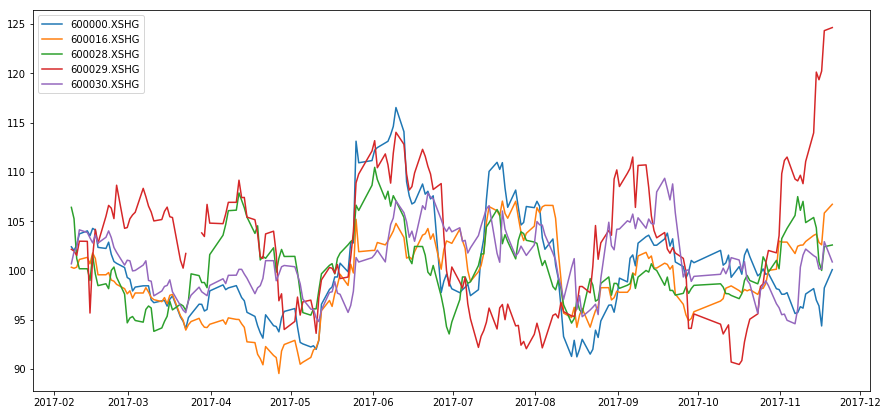

In [25]:
import pandas as pd
import numpy as np
import talib as tb
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7)) 
data = pd.read_excel('sz50.xlsx' , sheetname = None, index_col = 'datetime')
date_index = pd.read_excel( 'sz50.xlsx' ,index_col = 'datetime').index
columns_index = pd.read_excel('sz50.xlsx').columns
new_dict = {}
for key,value in data.items():
    try:
        index = value.index
        new_dict[key] = pd.Series(tb.ROCR100(value.close.values, timeperiod = 20), index = index)
    except AttributeError:
        pass
df = pd.DataFrame(new_dict)
list = df.columns.values.tolist()
for i in range(5):
    plt.plot(df[list[i]],label = list[i])
plt.legend()
plt.show()


   

5.用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式
输出如下：


In [3]:
from datetime import datetime
import talib.abstract as ta
import pandas as pd
symbol=stock1.keys()
data_dict = {}
for s in symbol:
        data =  pd.read_excel('sz50.xlsx',sheetname=s , index_col='datetime').dropna(how="all")
        data_dict[s] = data.loc['2016-12-24':'2018-02-24']
        PN = pd.Panel(data_dict)
#PN=PN.dropna(how="ALL")
MI_tp = PN.transpose(2,1,0).to_frame()

pn_macd = pd.Panel({name: ta.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame()
print(df_macd)


Exception: inputs are all NaN